In [1]:
import os
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import argparse
sns.set(style="darkgrid")
from sklearn.metrics import classification_report

In [2]:
args= argparse.Namespace(
    loc = '../data/'
)

In [3]:
!ls ../data/runs

FalsePostive_english_task_1_run_1.tsv FalsePostive_german_task_2_run_3.tsv
FalsePostive_english_task_2_run_1.tsv FalsePostive_hindi_task_1_run_2.tsv
FalsePostive_english_task_2_run_2.tsv FalsePostive_hindi_task_2_run_1.tsv
FalsePostive_english_task_3_run_1.tsv FalsePostive_hindi_task_3_run_1.tsv
FalsePostive_german_task_1_run_2.tsv


# Global Variables

## Gold Labels

In [4]:
ENGLISH_GOLD = pd.read_csv(
    os.path.join(args.loc,'gold','english_data.tsv'),
    sep='\t'
)
HINDI_GOLD = pd.read_csv(
    os.path.join(args.loc,'gold','hindi_data.tsv'),
    sep='\t'
)
GERMAN_GOLD = pd.read_csv(
    os.path.join(args.loc,'gold','german_data.tsv'),
    sep='\t'
)

In [5]:
ENGLISH_GOLD.columns

Index(['text_id', 'text', 'task_1', 'task_2', 'task_3'], dtype='object')

In [6]:
HINDI_GOLD.columns

Index(['text_id', 'text', 'task_1', 'task_2', 'task_3'], dtype='object')

## Model Predictions

In [7]:
GERMAN_PREDS = {  
    'task_1': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_german_task_1_run_2.tsv',),
        sep='\t'
    ) ,
    'task_2': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_german_task_2_run_3.tsv',),
        sep='\t'
    ) ,
}

In [8]:
ENGLISH_PREDS = {  
    'task_1': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_english_task_1_run_1.tsv',),
        sep='\t'
    ) ,
    'task_2': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_english_task_2_run_2.tsv',),
        sep='\t'
    ) ,
    'task_3': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_english_task_3_run_1.tsv',),
        sep='\t'
    ) ,
}


In [9]:
HINDI_PREDS = {  
    'task_1': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_hindi_task_1_run_2.tsv',),
        sep='\t'
    ) ,
    'task_2': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_hindi_task_2_run_1.tsv',),
        sep='\t'
    ) ,
    'task_3': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_hindi_task_3_run_1.tsv',),
        sep='\t'
    ) ,
}


# Helper Functions

In [10]:
def get_analysis(
    gold_df:pd.DataFrame,
    pred_df:pd.DataFrame,
    subtask:str,
):
    """
    Args:
        gold_df: DataFrame containing gold labels
        preds_df: DataFrame containing model preds
        subtask: 1,2 or 3
    Returns:
        analysis_df: DF containing the columns  Text, True labels as 'true'
            predicted labels as 'pred'
        cross_tab: A pandas crosstab as confusion matrix
    """
    pred_df.rename(
        columns={'result':'pred'},
        inplace=True,
    )
#     gold_df = gold_df[['text_id','text',f'task_{subtask}']]
        
    analysis_df = pd.merge(
        pred_df,
        gold_df,
        on='text_id',
    )
    analysis_df.rename(
        columns={f'task_{subtask}': 'true'},
        inplace=True
    )
    cross_tab = pd.crosstab(
        analysis_df.true , #y_true
        analysis_df.pred , #y_pred
        rownames=['True'], colnames=['Predicted'], margins=True
    )
    return analysis_df, cross_tab

In [11]:

def print_samples(
    analysis_df:pd.DataFrame,
    mistakes:bool=True,
    num_samples:int=5
)-> None:
    """Prints the samples for analysis"""
    
    with pd.option_context('display.max_colwidth', -1): 
        if mistakes: #print misclassifications
            df = analysis_df[analysis_df.true != analysis_df.pred]
            [['text','true','pred']]
        else: #print correct classifications
            df = analysis_df[analysis_df.true == analysis_df.pred]
            [['text','true','pred']]
        
        del df['text_id']
        df = df[['text','pred','true']]
        print(df.sample(num_samples))
        
        print('\n',df['text'].map(len).describe())

# English Error Analysis

## Task 1

In [12]:
ENGLISH_PREDS[f'task_{1}']

,Unnamed: 0,text_id,result
0,0,hasoc_en_207,HOF
1,1,hasoc_en_568,HOF
2,2,hasoc_en_137,HOF
3,3,hasoc_en_214,HOF
4,4,hasoc_en_869,HOF
...,...,...,...
1148,1148,hasoc_en1_7212,NOT
1149,1149,hasoc_en1_3958,NOT
1150,1150,hasoc_en1_4648,NOT
1151,1151,hasoc_en1_4832,NOT


In [13]:
task = 1
eng_task_1_analysis_df, eng_task_1_crosstab =  get_analysis(
    gold_df = ENGLISH_GOLD,
    pred_df = ENGLISH_PREDS[f'task_{task}'],
    subtask = task,
)

In [14]:
print(classification_report(
    y_true = eng_task_1_analysis_df.true,
    y_pred = eng_task_1_analysis_df.pred,
    digits = 4,
))

              precision    recall  f1-score   support

         HOF     0.4079    0.4688    0.4362       288
         NOT     0.8139    0.7734    0.7931       865

    accuracy                         0.6973      1153
   macro avg     0.6109    0.6211    0.6147      1153
weighted avg     0.7125    0.6973    0.7040      1153



In [15]:
print_samples(
    analysis_df = eng_task_1_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                                                                                                      text  \
231  For those abusing didi on a daily,  LOL  She might lose the state election but she won't go without a fight !    Mamata Banerjee succeeds in breaking logjam, doctors call off strike after 7 days https://www.indiatoday.in/india/story/mamata-succeeds-doctors-call-off-strike-1550768-2019-06-17 … via @indiatoday   
621  Pig 3 really having 'fun' with  #EuropeanCricketLeague standards, because of course.     I've seen Indians lately argue that it's okay if cricket becomes IPL only, and if anyone expects the ICC will open up the game, they're stupid.    What a sorry bunch of people.                                               
268  Ya ALLAH! let the beauty of Islam reign! 

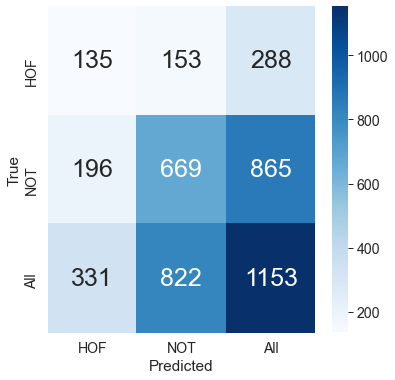

In [16]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        eng_task_1_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 25},
    )
    f.savefig(
        'confmats/eng_1_confmat.pdf', format='pdf', dpi=600
    )


## Task 2

In [17]:
task = 2
eng_task_2_analysis_df, eng_task_2_crosstab =  get_analysis(
    gold_df = ENGLISH_GOLD,
    pred_df = ENGLISH_PREDS[f'task_{task}'],
    subtask = task,
)

In [18]:
print(classification_report(
    y_true = eng_task_2_analysis_df.true,
    y_pred = eng_task_2_analysis_df.pred,
    digits = 4,
))

              precision    recall  f1-score   support

        HATE     0.1688    0.3145    0.2197       124
        NONE     0.8139    0.7734    0.7931       865
        OFFN     0.2308    0.0423    0.0714        71
        PRFN     0.2989    0.2796    0.2889        93

    accuracy                         0.6392      1153
   macro avg     0.3781    0.3524    0.3433      1153
weighted avg     0.6671    0.6392    0.6463      1153



In [19]:
print_samples(
    analysis_df = eng_task_2_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                                                                               text  \
17   Omar was allowed to take the oath of office on the Koran. That is a disgrace. She is follower of Islam. The difference between a radical & moderate follower is:    Radical: Worship Allah or I will behead you.  Moderate: Worship Allah or Radical will behead you.    She is the harbinger    
296  Aimim Floor Leader & (Chairman Salar E Millat Educational Trust) Janab @akbarowaisii Sahab Laying Foundation Stone of #Owaisi #Junior_College at Owaisi School of Excellence, Jamal Colony , #Riyasath_Nagar  branch  @asadowaisi @imAkbarOwaisi                                                 
894  @ZomatoIN #BycottZomato     HALAL AND HALALA      Are two most cruel possible things possible to an animal or 

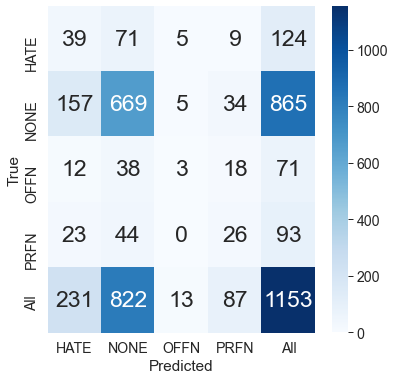

In [20]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        eng_task_2_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 23},
    )
    f.savefig(
        'confmats/eng_2_confmat.pdf', format='pdf', dpi=600
    )


## Task 3

In [21]:
task = 3
eng_task_3_analysis_df, eng_task_3_crosstab = get_analysis(
    gold_df = ENGLISH_GOLD,
    pred_df = ENGLISH_PREDS[f'task_{task}'],
    subtask = task,
)

In [22]:
print(classification_report(
    y_true = eng_task_3_analysis_df.true,
    y_pred = eng_task_3_analysis_df.pred,
    digits = 4,
))

              precision    recall  f1-score   support

        NONE     0.8139    0.7734    0.7931       865
         TIN     0.3652    0.4204    0.3909       245
         UNT     0.0816    0.0930    0.0870        43

    accuracy                         0.6730      1153
   macro avg     0.4202    0.4289    0.4237      1153
weighted avg     0.6912    0.6730    0.6813      1153



In [23]:
print_samples(
    analysis_df = eng_task_3_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                    text  \
84   Then your party needs to do what it was elected to Westminster for and vote! Fuck principle somethings are more important than sitting on top of your poxxy high horse!                                                               
732  #फतवे_की_फिक्सिंग wat d hell is going on.. Is it our india Mamata n all pol8cl prties who support Muslims it means they are secular fuck off                                                                                          
841  'oppressed people who don't realize they're oppressed are stupid and weak sheeple' is an odd take to call feminist or intersectional.                                                                                                 
135  Now doubt women is not a sex object “ pagans” used 

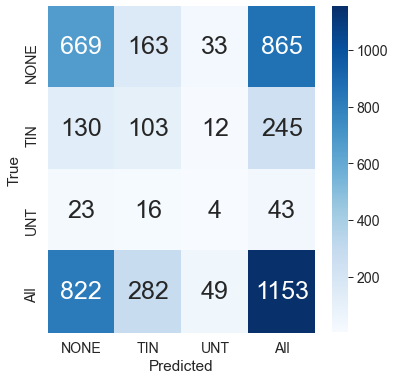

In [24]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        eng_task_3_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 25},
    )
    f.savefig(
        'confmats/eng_3_confmat.pdf', format='pdf', dpi=600
    )


# Hindi Error Analysis

## TASK 1

In [25]:
task = 1
hin_task_1_analysis_df, hin_task_1_crosstab =  get_analysis(
    gold_df = HINDI_GOLD,
    pred_df = HINDI_PREDS[f'task_{task}'],
    subtask = task,
)

In [26]:
print(classification_report(
    y_true = hin_task_1_analysis_df.true,
    y_pred = hin_task_1_analysis_df.pred,
    digits = 5,
))

              precision    recall  f1-score   support

         HOF    0.74519   0.76860   0.75671       605
         NOT    0.79827   0.77700   0.78749       713

    accuracy                        0.77314      1318
   macro avg    0.77173   0.77280   0.77210      1318
weighted avg    0.77391   0.77314   0.77336      1318



In [27]:
print_samples(
    analysis_df = hin_task_1_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                                                                         text  \
1072  #कुत्ते की #नींद, #गिरगिट के #रंग, #मगरमच्छ के #आँसू..... . . . . . . . . . . लड़कीयों के #ILoveYou पे कभी भरोसा मत करना.... #BSDK @CRahuly                                                                                                                                               
183   भाजपा वालो बेटी बचाओ नारा था या चेतावनी ? हमारे देश में महिलाओं को देवी का दर्जा दिया जाता है. लेकिन गुजरात की ये घटना कुछ अलग दिखाती है। घोर शर्मनाक। #चूड़ी_पहन_लो                                                                                                                      
617   अखिलेश ने कहा है कि जो अधिकारी कल तक हमारी #कप_प्लेट उठाते थे, वे मुझसे बंगले के बारे में सवाल कर रहे हैं। सोचिये ऐसी #नीच सोच 

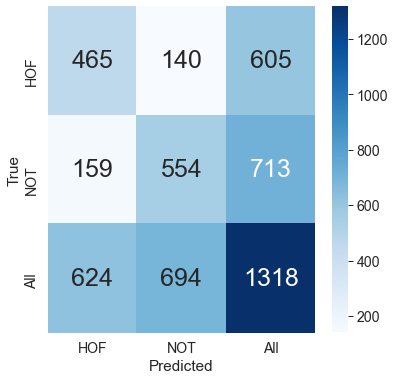

In [28]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        hin_task_1_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 25},
    )
    f.savefig(
        'confmats/hin_1_confmat.pdf', format='pdf', dpi=600
    )


## Task 2

In [29]:
task = 2
hin_task_2_analysis_df, hin_task_2_crosstab =  get_analysis(
    gold_df = HINDI_GOLD,
    pred_df = HINDI_PREDS[f'task_{task}'],
    subtask = task,
)

In [30]:
print_samples(
    analysis_df = hin_task_2_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          text  \
887  कौन है वो लोग जिन्हें वन्दे मातरम और भारत माता की जय कहने से दिक्कत है? ये देशद्रोही है या भाजपा के दलाल?  भाजपा इन्ही सब फर्जी मुद्दों को उठाकर देश को विपरीत दिशा में ले जा रही है, आप शौख से कहिए ये आपका देश है।  फालतू के मुद्दों को बढ़ावा देकर उन्हें लाभ न पहुचाए।  जय हिंद।                                                                                                                                                                                                             

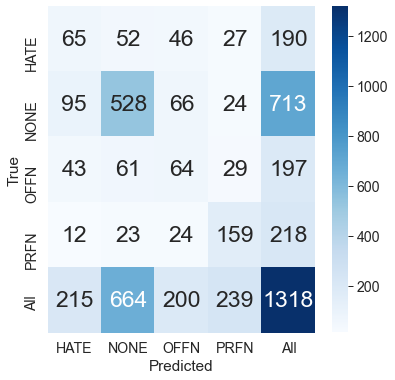

In [31]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        hin_task_2_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 23},
    )
    f.savefig(
        'confmats/hin_2_confmat.pdf', format='pdf', dpi=600
    )


## Task 3

In [32]:
task = 3
hin_task_3_analysis_df, hin_task_3_crosstab =  get_analysis(
    gold_df = HINDI_GOLD,
    pred_df = HINDI_PREDS[f'task_{task}'],
    subtask = task,
)

In [33]:
print_samples(
    analysis_df = hin_task_3_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                                                                          text  \
364   चुनाव में हार के बाद से ही गायब तेजस्वी यादव की वापसी, अहले सुबह पटना पहुंचे तेजस्वी  तेजस्वी ने कहा कि अपराध और स्वास्थ्य के मुद्दे पर सरकार से सवाल करेंगे। हालांकि अपनी छुट्टियों पर फिर से सफाई देते हुए कहा कि वो जहां थे उसकी जानकारी उन्होंने ट्वीट करके दे दी।  @abpnewshindi      
1130  कुछ दिन से चर्चित मुद्दे  ये है दलाल #मीडिया के मुद्दे  1. हलाला बंद हो? 2. जय श्री राम?  3. टीम इंडिया की भगवा जर्सी?  4. जायरा वसीम ने बोलीवुड क्यूँ छोड़ा?  ये #जनता के मुद्दे   1 बिहार 200+बच्चे मर गए 2 हर रोज lynching 3 हर रोज बलात्कार 4 GDP 5. Unemployment  6.GST failure       
629   अशरफ विधायक का उपचुनाव लड़ रहे थे, प्रचार करने के लिए अखिलेश और धर्मेन्द्र दोनों आए थे और हमने मंच से कहा था कि दो मासूम बच्

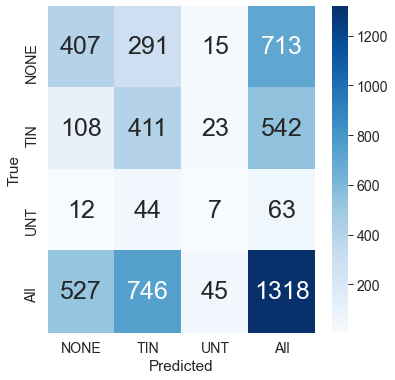

In [34]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        hin_task_3_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 25},
    )
    f.savefig(
        'confmats/hin_3_confmat.pdf', format='pdf', dpi=600
    )


# German Error Analysis

## Task 1


In [35]:
task = 1
ger_task_1_analysis_df, ger_task_1_crosstab =  get_analysis(
    gold_df = GERMAN_GOLD,
    pred_df = GERMAN_PREDS[f'task_{task}'],
    subtask = task,
)

In [36]:
print(classification_report(
    y_true = ger_task_1_analysis_df.true,
    y_pred = ger_task_1_analysis_df.pred,
    digits = 5,
))

              precision    recall  f1-score   support

         HOF    0.21277   0.14706   0.17391       136
         NOT    0.84656   0.89636   0.87075       714

    accuracy                        0.77647       850
   macro avg    0.52966   0.52171   0.52233       850
weighted avg    0.74515   0.77647   0.75925       850



In [37]:
print_samples(
    analysis_df = ger_task_1_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                                                                                text  \
784  Hoffentlich ist der bald weg, der die österreichische Kultur zerstören wollte. Böse Zungen sagen sogar wieder aufblühen lassen wollte.    #Faschistenmüssenweg. Egal ob links, rechts oder weiter nahöstlich.    Der #EkelWilfred, alias #Wiltewka, #Wilberg &amp; Co.  https://t.co/dqVFVSb98W   
823  Das hätte sich mal einer im „Deutschland verrecke! Deutschland Du mieses Stück Sch…“ leisten sollen. Großen Respekt &amp; Hochachtung vor diesem Mädel.    Der #EkelWilfred, alias das A…loch #Wiltewka, Papa #Wilberg von der Capitol, #WilayaWilanar &amp; O. #Wilke  https://t.co/lW2HvPZmK2   
814  Nicht gleich 'den Bettel hinschmeißen' – Bettel, bedeutet Nutzloses. Und diese Einstellung ist das einzige 

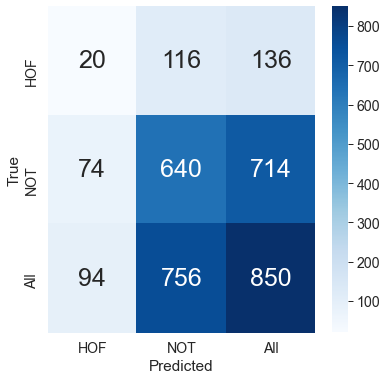

In [38]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        ger_task_1_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 25},
    )
    f.savefig(
        'confmats/ger_1_confmat.pdf', format='pdf', dpi=600
    )


## Task 2

In [39]:
task = 2
ger_task_2_analysis_df, ger_task_2_crosstab =  get_analysis(
    gold_df = GERMAN_GOLD,
    pred_df = GERMAN_PREDS[f'task_{task}'],
    subtask = task,
)

In [40]:
print_samples(
    analysis_df = ger_task_2_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                                                                                                                            text  \
780  Bessermenschen wollen, dass wir halbe Welt aufnehmen, Migranten sind für sie die besseren Menschen, obwohl sie oft frauenfeindlich, homophob, wissenschaftsfeindlich+radikal religiös geprägt sind.   Deal: Liebe Bessermenschis, zieht doch zu den 'besseren Menschen'+lasst D in Ruhe!                                                      
23   @Ralf64904117 @TheRealJoe_1958 Sehr gut. Verblödung, wo man hinschaut.                                                                                                                                                                                                                                                     

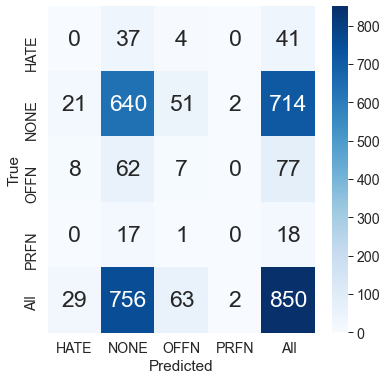

In [41]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        ger_task_2_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 23},
    )
    f.savefig(
        'confmats/ger_2_confmat.pdf', format='pdf', dpi=600
    )
